In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [2]:
pd.set_option('display.max_columns',100)
pd.options.mode.chained_assignment = None 

In [3]:
df=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\Trip2021_v1.csv')

# Clean Data 

In [4]:
df.columns=df.columns.str.replace('_',' ').str.title().str.replace(' ','').str.strip()

In [5]:
df['StartedAt']=pd.to_datetime(df.StartedAt)
df['EndedAt']=pd.to_datetime(df.EndedAt)

In [6]:
df['DurationInMinutes']=((df.EndedAt-df.StartedAt)/pd.Timedelta(minutes=1))

# Which is most preffered type of bike

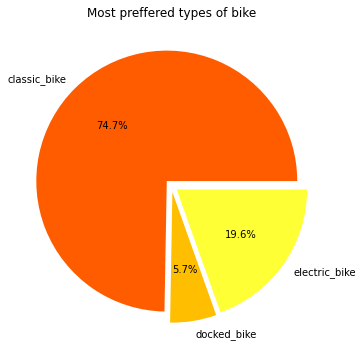

In [7]:
grouped=df.groupby('RideableType')['RideId'].count().reset_index()
colors=list(plt.get_cmap('hot')(np.linspace(.5,.8,3)))

plt.figure(figsize=(6,6))
plt.pie(grouped.RideId,labels=grouped.RideableType,autopct='%.1f%%',colors=colors,explode=[0.05,0.05,0.05])
plt.title('Most preffered types of bike')
plt.show()

## Find distance between start and end points. How distance between two points are distributed  

In [8]:
df['LatDiff']=(df.EndLat-df.StartLat)
df['LngDiff']=(df.EndLng-df.StartLng)
df['Distance']=(df.LatDiff**2+df.LngDiff**2)**0.5*111
df['Speed']=df.Distance/df.DurationInMinutes

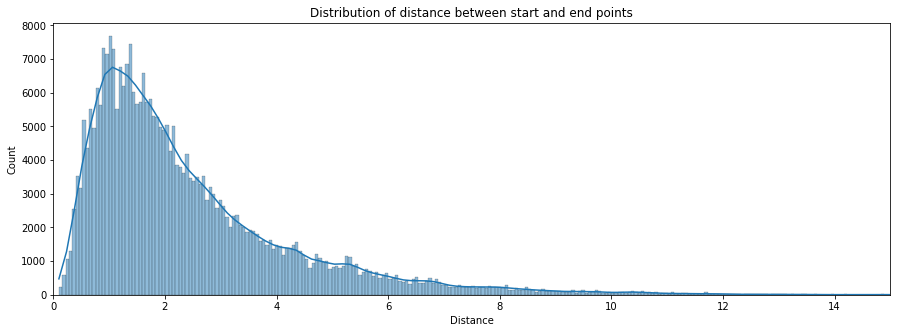

In [9]:
plt.figure(figsize=(15,5))
sns.histplot(data=df[df.Distance>0.1],x='Distance',kde=True)
plt.title('Distribution of distance between start and end points')
plt.xlim(0,15)
plt.show()

In [10]:
# for the most of the cases trip distance is not more than 10-11 KMs. With bikes this distance should be covered within 40 minutes
# if a person does not stay for too much inactive.
# we should find the durtation limit for which the correlation between ditance and duration is max. 

# Find distribution of duration frequencies 

In [11]:
filtereddf=df[(df.DurationInMinutes<40)&(df.Distance>=0.1)]

In [12]:
# when trip duration is under 40 minutes then the correlation between duration and distance is max 

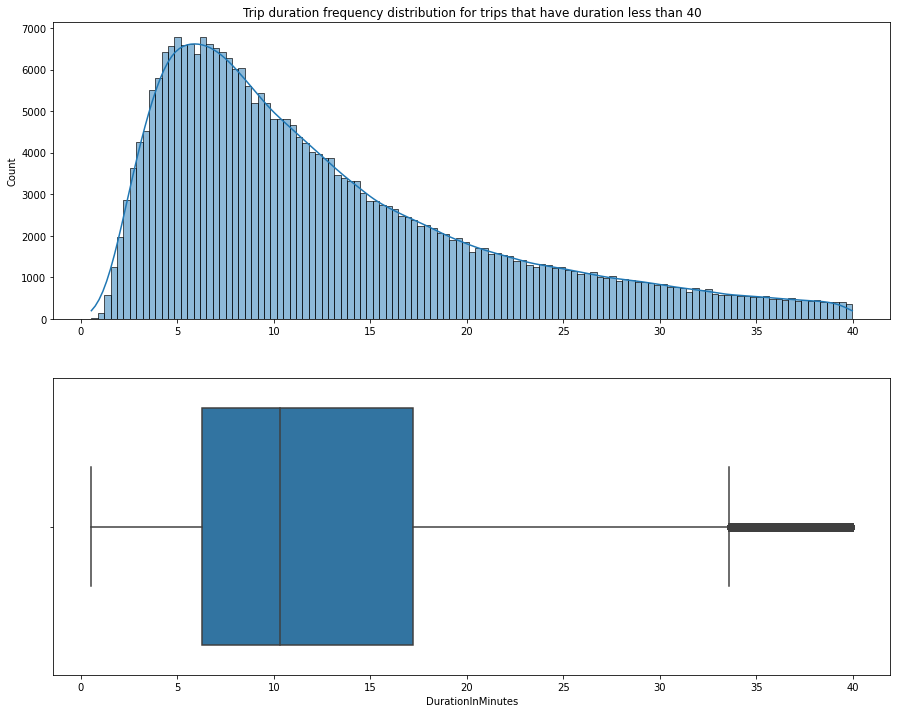

<Figure size 1188x360 with 0 Axes>

In [13]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,12))
sns.histplot(data=filtereddf,x='DurationInMinutes',kde=True,ax=ax1)
ax1.set_title("Trip duration frequency distribution for trips that have duration less than 40")
ax1.set_xlabel('')

plt.figure(figsize=(16.5,5))
sns.boxplot(data=filtereddf,x='DurationInMinutes',ax=ax2)

plt.show()

# Find  average duration for each trip combination

In [14]:
grouped=df.groupby(['StartStationId','EndStationId'])[['Distance','DurationInMinutes','Speed']].mean().reset_index()
grouped=grouped.sort_values(['StartStationId','EndStationId'])

In [17]:
filtered=grouped[(grouped.DurationInMinutes<40)&(grouped.Distance>0.1)]

In [18]:
print('Max correlation coefficient is '+str(filtered.DurationInMinutes.corr(filtered.Distance)))

Max correlation coefficient is 0.7253305124711836


# Find duration vs distance distribution for the filtered data 

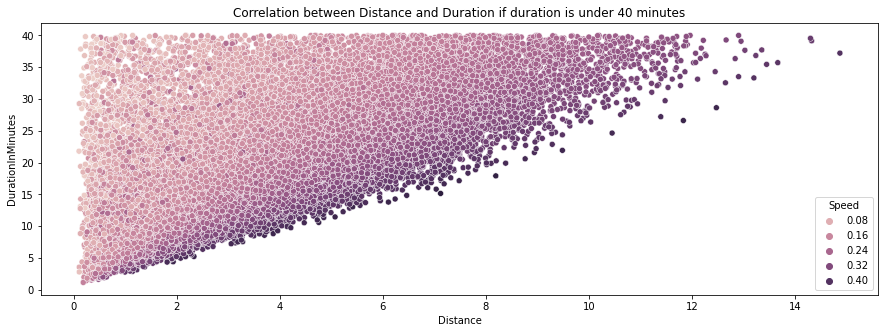

In [19]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=filtered,x='Distance',y='DurationInMinutes',hue='Speed')
plt.title('Correlation between Distance and Duration if duration is under 40 minutes')
plt.show()

# Plot the distribution of average speed 

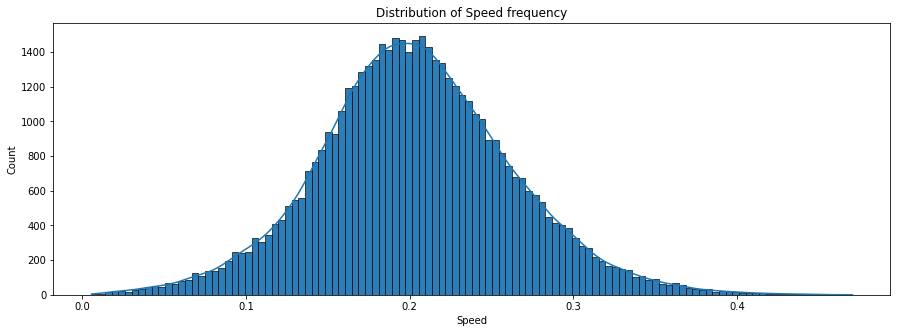

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(data=filtered,x='Speed',kde=True,alpha=0.95)
plt.title('Distribution of Speed frequency')
plt.show()

As expected, speed distribution has Normal Distribution shape. Mainly because it is dependant on biological factors of a person.

In [21]:
filtered.Speed.describe()

count    49131.000000
mean         0.203572
std          0.059484
min          0.005516
25%          0.165451
50%          0.201763
75%          0.240525
max          0.470596
Name: Speed, dtype: float64

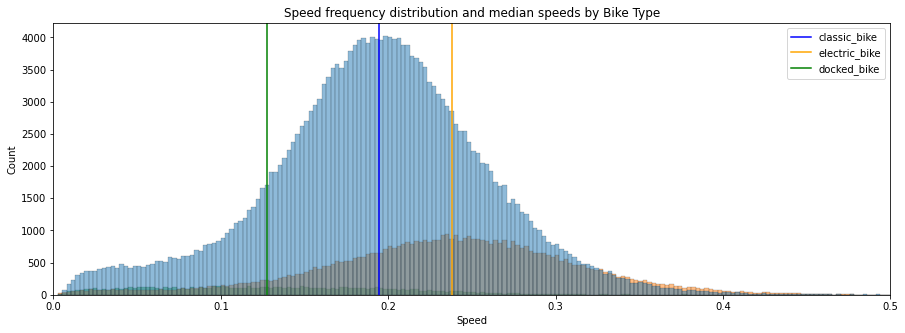

In [22]:
plt.figure(figsize=(15,5))
ax=sns.histplot(data=filtereddf,x='Speed',hue='RideableType')
plt.xlim(0,0.5)

ax.axvline(filtereddf[filtereddf.RideableType=='classic_bike']['Speed'].median(),label='classic_bike',c='b')
ax.axvline(filtereddf[filtereddf.RideableType=='electric_bike']['Speed'].median(),label='electric_bike',c='orange')
ax.axvline(filtereddf[filtereddf.RideableType=='docked_bike']['Speed'].median(),label='docked_bike',c='g')
plt.legend()
plt.title('Speed frequency distribution and median speeds by Bike Type')
plt.show()

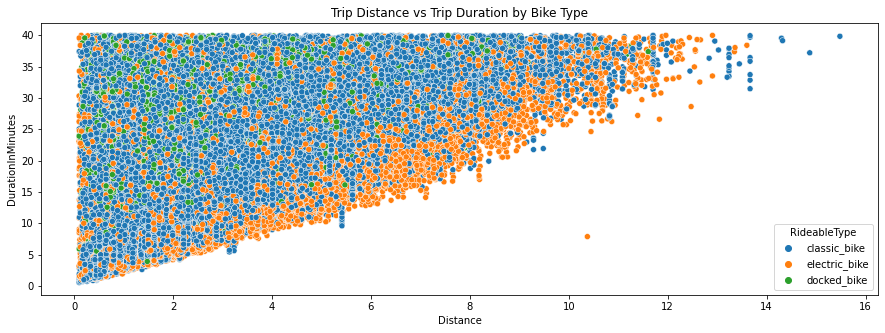

Correlation between distance and duration for classic_type bike is 0.74
Correlation between distance and duration for electric_type bike is 0.75
Correlation between distance and duration for docked_type bike is 0.36


In [23]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=filtereddf,x='Distance',y='DurationInMinutes',hue='RideableType')
plt.title('Trip Distance vs Trip Duration by Bike Type')
plt.show()

print('Correlation between distance and duration for classic_type bike is '+str(round(filtereddf[filtereddf.RideableType=='classic_bike'].Distance.corr(filtereddf[filtereddf.RideableType=='classic_bike'].DurationInMinutes),2)))
print('Correlation between distance and duration for electric_type bike is '+str(round(filtereddf[filtereddf.RideableType=='electric_bike'].Distance.corr(filtereddf[filtereddf.RideableType=='electric_bike'].DurationInMinutes),2)))
print('Correlation between distance and duration for docked_type bike is '+str(round(filtereddf[filtereddf.RideableType=='docked_bike'].Distance.corr(filtereddf[filtereddf.RideableType=='docked_bike'].DurationInMinutes),2)))

### Summary for the plot

Correlation coefficient for classic and electric bikes are high and positive as expected.

On the other hand, for dock-typed bike correlation is not that high. Values are highly dispersed on the plot,
because trip duration for a specific distance is higher than expected. This might be because needed time for dock/undock and related procedures are included in the trip time? I think, docked-type bike should take more procedures and therefore  more time, than classic or electric bikes